In [1]:
import  os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
#from mpl_toolkits.axes_grid1 import make_axes_locatable
import osmnx as ox
import geopandas as gpd
from shapely.geometry import Point, Polygon
from shapely import wkt
from shapely.ops import unary_union

## 数据导入及预处理

In [3]:
# 导入POI数据
path1 ='D:/317研究组/4 居住自选择/data/relevant_poi/深圳_公司企业.csv'
work_poi = pd.read_csv(path1)
work_poi = work_poi.drop(['gcj02_lon','gcj02_lat'], axis=1)

path2 = 'D:/317研究组/4 居住自选择/data/relevant_poi/sz_community/深圳_小区_边界（筛选有wkt）.csv'
community_poi = pd.read_csv(path2,encoding='gbk')

In [4]:
community_poi.head()

,id,name,address,x,y,wkt
0,1,众和花园,(宝安区松岗)松岗镇塘下涌村塘下涌村委会旁,113.843364,22.800213,POLYGON ((113.8414479227904 22.802024862622623...
1,2,风尚时代,(宝安区新安)建安一路514,113.887086,22.579766,POLYGON ((113.88643175168947 22.57972265664138...
2,3,永安商业城,(宝安区西乡)荔园路118号,113.875770,22.578428,POLYGON ((113.87527632035147 22.57804857087692...
3,4,恒丰工业城,(宝安区曦城)洲石路739号,113.861983,22.632287,POLYGON ((113.85965183001912 22.63003739804109...
4,5,西万住宅楼,(宝安区西乡)福成路78号,113.878373,22.580069,POLYGON ((113.87857465783742 22.58008053558658...


In [5]:
# 分别为work_poi和home_poi构建gpd对象
work_geometry = [Point(xy) for xy in zip(work_poi['wgs84_lon'],work_poi['wgs84_lat'])]
crs = {'init':'epsg:4326'}
work_poi_gpd = gpd.GeoDataFrame(work_poi,crs=crs,geometry=work_geometry)

#community_geometry = [loads(x) for x in community_poi['wkt']]
community_poi['wkt'] = community_poi['wkt'].apply(wkt.loads)
crs = {'init':'epsg:4326'}
community_poi_gpd = gpd.GeoDataFrame(community_poi,crs=crs,geometry=community_poi.wkt)

C:\Users\huangnx\AppData\Roaming\Python\Python39\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\huangnx\AppData\Roaming\Python\Python39\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [6]:
community_poi_gpd.head()

,id,name,address,x,y,wkt,geometry
0,1,众和花园,(宝安区松岗)松岗镇塘下涌村塘下涌村委会旁,113.843364,22.800213,POLYGON ((113.8414479227904 22.802024862622623...,"POLYGON ((113.84145 22.80202, 113.84163 22.801..."
1,2,风尚时代,(宝安区新安)建安一路514,113.887086,22.579766,POLYGON ((113.88643175168947 22.57972265664138...,"POLYGON ((113.88643 22.57972, 113.88684 22.579..."
2,3,永安商业城,(宝安区西乡)荔园路118号,113.875770,22.578428,POLYGON ((113.87527632035147 22.57804857087692...,"POLYGON ((113.87528 22.57805, 113.87528 22.578..."
3,4,恒丰工业城,(宝安区曦城)洲石路739号,113.861983,22.632287,POLYGON ((113.85965183001912 22.63003739804109...,"POLYGON ((113.85965 22.63004, 113.85978 22.632..."
4,5,西万住宅楼,(宝安区西乡)福成路78号,113.878373,22.580069,POLYGON ((113.87857465783742 22.58008053558658...,"POLYGON ((113.87857 22.58008, 113.87873 22.579..."


<AxesSubplot:>

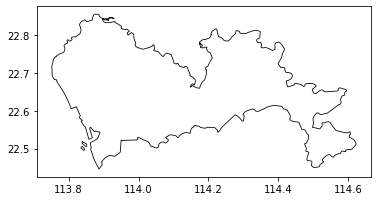

In [14]:
# 导入深圳地图
file_name ="D:/317研究组/4 居住自选择/data/shenzhen_polygon/Shenzhen_polygon.shp"
sz_poly = gpd.read_file(file_name)

sz_poly.plot(fc='white',ec='black',linewidth=.8)

<AxesSubplot:>

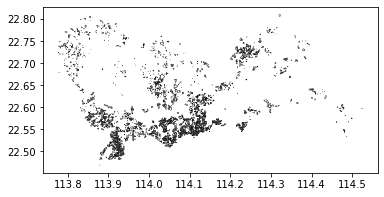

In [8]:
file_name2 = 'D:/317研究组/4 居住自选择/data/relevant_poi/sz_community/深圳_小区_边界（筛选有wkt）.shp'
sz_community_poly = gpd.read_file(file_name2)
sz_community_poly.plot(fc='white',ec='black',linewidth=.4)

<AxesSubplot:>

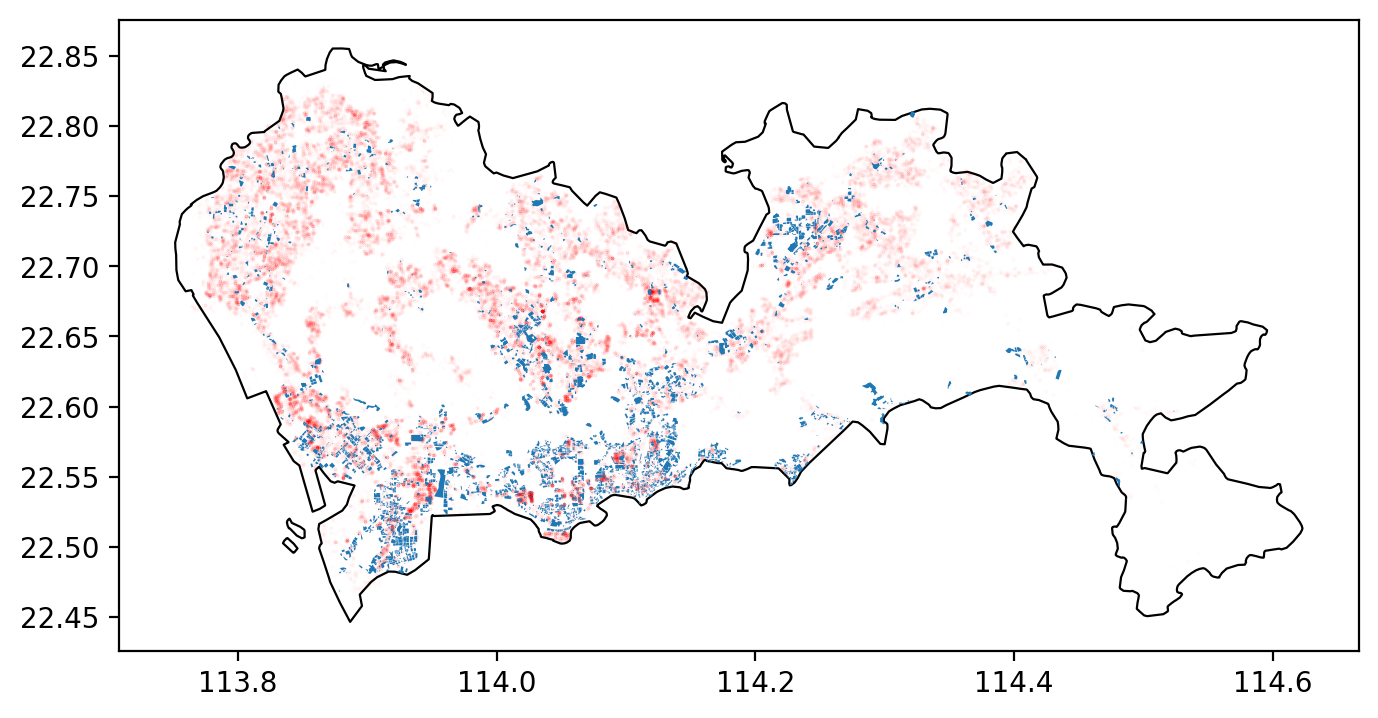

In [8]:
# 将居住点和工作点打在地图上
fig, ax = plt.subplots(figsize=(8,5), dpi=200)
sz_poly.plot(fc='white',ec='black',linewidth=.8, ax=ax)
work_poi_gpd.plot(marker='.', color='r', alpha=0.01, markersize=.5, ax=ax)
community_poi_gpd.plot(linewidth=.4, ax=ax)

In [43]:
# 导入候选网格数据
grid_path = 'D:/317研究组/4 居住自选择/data/ss_city_grid/grid/ss_city_grid_by_cover.csv'
ss_grid_data = pd.read_csv(grid_path)

# 将ss_grid_date转化为geoDataframe对象，其中geometry为wkt格式
ss_grid_data['wkt'] = ss_grid_data['wkt'].apply(wkt.loads)
ss_grid_data = gpd.GeoDataFrame(ss_grid_data,geometry=ss_grid_data.wkt, crs = 'EPSG:4326')
ss_grid_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\dtypes\inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\dtypes\inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\printing.py:117: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  s = iter(seq)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\fo

,fnid,chess_x,chess_y,wkt,geometry
0,413,56,1,"(POLYGON ((113.88581849 22.44961596, 113.88825...","MULTIPOLYGON (((113.88582 22.44962, 113.88826 ..."
1,665,308,1,"(POLYGON ((114.50078319 22.44961596, 114.50322...","MULTIPOLYGON (((114.50078 22.44962, 114.50322 ..."
2,666,309,1,"(POLYGON ((114.50322353 22.44961596, 114.50566...","MULTIPOLYGON (((114.50322 22.44962, 114.50566 ..."
3,667,310,1,"(POLYGON ((114.50566387 22.44961596, 114.50810...","MULTIPOLYGON (((114.50566 22.44962, 114.50810 ..."
4,668,311,1,"(POLYGON ((114.5081042 22.44961596, 114.510544...","MULTIPOLYGON (((114.50810 22.44962, 114.51054 ..."


In [44]:
len(ss_grid_data)

31478

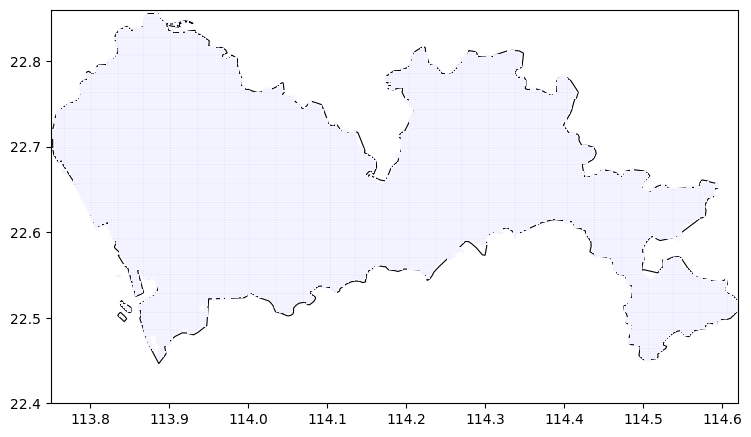

In [45]:
fig = plt.figure(1,(8,8),dpi = 100)
ax = plt.subplot(111)
plt.sca(ax)
fig.tight_layout(rect = (0.05,0.1,1,0.9))

bounds = [113.75, 22.4, 114.62, 22.86]

sz_poly.plot(ax=ax,fc='white',ec='black',linewidth=.8)
ss_grid_data.plot(ax=ax,fc='white',ec='blue',linewidth=.02)

plt.xlim(bounds[0],bounds[2])
plt.ylim(bounds[1],bounds[3])
plt.show()

In [4]:
# 导入土地利用的shp文件，并生成gpd对象
landuse_path = 'D:/317研究组/4 居住自选择/data/landuse_adjust/landuse_adjust.shp'
landuse_data = gpd.read_file(landuse_path)
landuse_data = landuse_data.to_crs('EPSG:4326')

数据属性
BSM - 标识码
YSDM - 要素代码
DLBH - 地类编号
DLMC - 地类名称
GDLX - 耕地类型
GBDLMC - 归并地类名称
XHDLBM - 细化地类编码
XHDLMC - 细化地类名称

In [5]:
landuse_data.head()

,OBJECTID,BSM,YSDM,TBYBH,TBBH,DLBM,DLMC,QSXZ,QSDWDM,QSDWMC,...,BGJLH,BGRQ,XZGDJFLY,GBDLMC,XHDLBM,XHDLMC,LSQ,SHAPE_AREA,SHAPE_LEN,geometry
0,97,102,2001010100,None,1367,201,城市,10,4403080040010000000,盐田街道,...,None,2013-08-08,None,建设用地,052,住宿餐饮用地,盐田区,223.585519,60.676328,"POLYGON ((114.27612 22.63126, 114.27620 22.631..."
1,98,103,2001010100,R,75,201,城市,10,4403080040010000000,盐田街道,...,2011014,2011-11-14,None,建设用地,087,公园与绿地,盐田区,17943.194482,937.315642,"POLYGON ((114.27450 22.63122, 114.27487 22.631..."
2,99,104,2001010100,None,83,033,其他林地,10,4403080040010000000,盐田街道,...,None,2009-12-31,None,农用地,033,其他林地,盐田区,22724.405486,1181.221088,"POLYGON ((114.28349 22.63082, 114.28354 22.630..."
3,100,105,2001010100,None,73,114,坑塘水面,10,4403080040010000000,盐田街道,...,None,2009-12-31,None,农用地,114,坑塘水面,盐田区,2613.943563,277.344394,"POLYGON ((114.27778 22.63082, 114.27777 22.630..."
4,101,106,2001010100,None,1424,033,其他林地,10,4403080040010000000,盐田街道,...,None,2013-08-08,None,农用地,033,其他林地,盐田区,54938.315447,2870.518990,"POLYGON ((114.27918 22.62983, 114.27926 22.629..."


<AxesSubplot:>

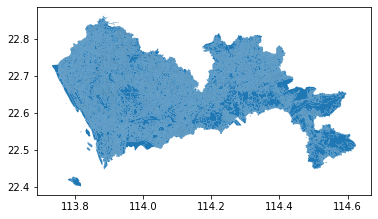

In [76]:
landuse_data.plot()

In [85]:
# 地类名称有空值吗 -- 无
landuse_data['DLMC'].isnull().sum()

0

In [32]:
# 看看landuse_data中的distinct value
print(landuse_data['DLMC'].unique())
print(landuse_data['XHDLMC'].unique())

['城市' '其他林地' '坑塘水面' '灌木林地' '公路用地' '港口码头用地' '有林地' '沟渠' '旱地' '内陆滩涂' '水工建筑用地'
 '农村道路' '河流水面' '水库水面' '果园' '风景名胜及特殊用地' '其他草地' '沿海滩涂' '水浇地' '裸地' '设施农用地'
 '采矿用地' '铁路用地' '管道运输用地' '其他园地' '茶园' '机场用地' '天然牧草地' '水田' '人工牧草地' '村庄']
['住宿餐饮用地' '公园与绿地' '其他林地' '坑塘水面' '灌木林地' '街巷用地' '公路用地' '空闲地' '机关团体用地'
 '港口码头用地' '工业用地' '公共设施用地' '有林地' '科教用地' '城镇住宅用地' '农村宅基地' '仓储用地' '沟渠' '旱地'
 '内陆滩涂' '水工建筑用地' '农村道路' '河流水面' '水库水面' '果园' '殡葬用地' '其他草地' '批发零售用地' '文体娱乐用地'
 '其他商服用地' '风景名胜设施用地' '医卫慈善用地' '军事设施用地' '沿海滩涂' '水浇地' '裸地' '设施农用地' '采矿用地'
 '铁路用地' '管道运输用地' '宗教用地' '其他园地' '商务金融用地' '新闻出版用地' '茶园' '监教场所用地' '机场用地'
 '天然牧草地' '水田' '人工牧草地']


In [34]:
landuse_data[landuse_data['XHDLMC']=='公园与绿地'].head()

,OBJECTID,BSM,YSDM,TBYBH,TBBH,DLBM,DLMC,QSXZ,QSDWDM,QSDWMC,...,BGJLH,BGRQ,XZGDJFLY,GBDLMC,XHDLBM,XHDLMC,LSQ,SHAPE_AREA,SHAPE_LEN,geometry
1,98,103,2001010100,R,75,201,城市,10,4403080040010000000,盐田街道,...,2011014,2011-11-14,None,建设用地,087,公园与绿地,盐田区,17943.194482,937.315642,"POLYGON ((114.27450 22.63122, 114.27487 22.631..."
19,116,122,2001010100,None,1268,201,城市,10,4403080040010000000,盐田街道,...,2011014,2011-11-14,None,建设用地,087,公园与绿地,盐田区,357.689281,102.837068,"POLYGON ((114.27586 22.63042, 114.27594 22.630..."
20,117,124,2001010100,None,1277,201,城市,10,4403080040010000000,盐田街道,...,2011014,2011-11-14,None,建设用地,087,公园与绿地,盐田区,159.112239,62.662202,"POLYGON ((114.27568 22.63039, 114.27581 22.630..."
24,121,128,2001010100,R,86,201,城市,10,4403080040010000000,盐田街道,...,None,2009-12-31,None,建设用地,087,公园与绿地,盐田区,4648.852099,692.108128,"POLYGON ((114.27870 22.62989, 114.28024 22.628..."
32,129,215,2001010100,R,94,201,城市,10,4403080040010000000,盐田街道,...,None,2009-12-31,None,建设用地,087,公园与绿地,盐田区,8718.984372,742.045391,"POLYGON ((114.28308 22.62677, 114.28299 22.626..."


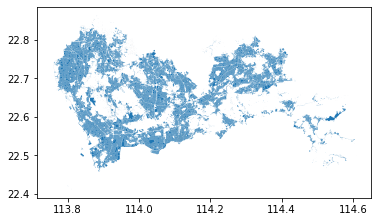

In [50]:
# 绘制landuse_data中用地类型为“城市”或“村庄”的区域
latent_anchor = landuse_data[landuse_data['DLMC'].isin(['城市','村庄'])]
# 删除latent_anchor中的XHDLMC为“公园与绿地”、“公共设施用地”的区域
latent_anchor = latent_anchor[~latent_anchor['XHDLMC'].isin(['公园与绿地','公共设施用地'])]
latent_anchor.plot()

# 整合latent_anchor的geometry，得到一个polygon，并绘制
latent_anchor_union = unary_union(latent_anchor.geometry)
#latent_anchor_union = gpd.GeoDataFrame(geometry=[latent_anchor_union],crs='EPSG:4326')

In [106]:
ss_grid_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\dtypes\inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\dtypes\inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\printing.py:117: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  s = iter(seq)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\fo

,fnid,chess_x,chess_y,wkt,geometry
0,413,56,1,"(POLYGON ((113.88581849 22.44961596, 113.88825...","MULTIPOLYGON (((113.88582 22.44962, 113.88826 ..."
1,665,308,1,"(POLYGON ((114.50078319 22.44961596, 114.50322...","MULTIPOLYGON (((114.50078 22.44962, 114.50322 ..."
2,666,309,1,"(POLYGON ((114.50322353 22.44961596, 114.50566...","MULTIPOLYGON (((114.50322 22.44962, 114.50566 ..."
3,667,310,1,"(POLYGON ((114.50566387 22.44961596, 114.50810...","MULTIPOLYGON (((114.50566 22.44962, 114.50810 ..."
4,668,311,1,"(POLYGON ((114.5081042 22.44961596, 114.510544...","MULTIPOLYGON (((114.50810 22.44962, 114.51054 ..."


## 空间计算

In [51]:
# 判断ss_grid_data中的每一个网格是否在latent_anchor内
ss_grid_data['is_within'] = ss_grid_data.apply(lambda x: x.geometry.intersects(latent_anchor_union), axis=1)
ss_grid_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\dtypes\inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\dtypes\inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\printing.py:117: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  s = iter(seq)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\fo

,fnid,chess_x,chess_y,wkt,geometry,is_within
0,413,56,1,"(POLYGON ((113.88581849 22.44961596, 113.88825...","MULTIPOLYGON (((113.88582 22.44962, 113.88826 ...",False
1,665,308,1,"(POLYGON ((114.50078319 22.44961596, 114.50322...","MULTIPOLYGON (((114.50078 22.44962, 114.50322 ...",False
2,666,309,1,"(POLYGON ((114.50322353 22.44961596, 114.50566...","MULTIPOLYGON (((114.50322 22.44962, 114.50566 ...",False
3,667,310,1,"(POLYGON ((114.50566387 22.44961596, 114.50810...","MULTIPOLYGON (((114.50566 22.44962, 114.50810 ...",False
4,668,311,1,"(POLYGON ((114.5081042 22.44961596, 114.510544...","MULTIPOLYGON (((114.50810 22.44962, 114.51054 ...",False


In [52]:
# 导出一下（珍贵数据）
ss_grid_data.to_csv('D:/317研究组/4 居住自选择/data/ss_city_grid/city-village_all_grid_info.csv',index=False)

<AxesSubplot:>

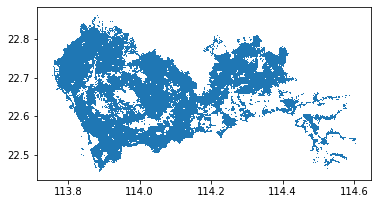

In [54]:
# 绘制ss_grid_data中is_within为True的网格
ss_latent_grid_data = ss_grid_data[ss_grid_data['is_within'] == True]
ss_latent_grid_data.plot(linewidth=.02)

In [57]:
len(ss_latent_grid_data)

21610

In [58]:
# 导出一下（珍贵数据）
ss_latent_grid_data[['fnid','chess_x','chess_y','wkt']].to_csv('D:/317研究组/4 居住自选择/data/ss_city_grid/city-village_all_grid_info.csv',index=False)

In [ ]:
# 计算每个网格中的work_poi的数量，使用is_within=True的网格
ss_latent_grid_data['work_poi_count'] = ss_latent_grid_data.apply(lambda x: work_poi_gpd[work_poi_gpd.within(x.geometry)].shape[0], axis=1)
ss_grid_data['community_poi_count'] = ss_grid_data.apply(lambda x: community_poi_gpd[community_poi_gpd.within(x.geometry)].shape[0], axis=1)